# Ex - GroupBy

### Introduction:

GroupBy can be summarizes as Split-Apply-Combine.

Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

Check out this [Diagram](http://i.imgur.com/yjNkiwL.png)  
### Step 1. Import the necessary libraries

In [1]:
%matplotlib inline
import pandas as pd

from IPython.core.display import HTML
css = open('../../style-table.css').read() + open('../../style-notebook.css').read()
HTML('<style>%s</style>' % css)

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv). 

### Step 3. Assign it to a variable called drinks.

In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv'
drinks = pd.read_csv(url)
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


### Step 4. Which continent drinks more beer on average?

In [3]:
drinks.continent.value_counts()

AF    53
EU    45
AS    44
OC    16
SA    12
Name: continent, dtype: int64

In [4]:
g = drinks.groupby('continent').mean()
g = g.sort_values('beer_servings', ascending=False)
g

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
EU,193.777778,132.555556,142.222222,8.617778
SA,175.083333,114.750000,62.416667,6.308333
OC,89.687500,58.437500,35.625000,3.381250
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455


In [5]:
g = drinks.groupby('continent').beer_servings.mean()
g

continent
AF     61.471698
AS     37.045455
EU    193.777778
OC     89.687500
SA    175.083333
Name: beer_servings, dtype: float64

### Step 5. For each continent print the statistics for wine consumption.

In [6]:
g = drinks.groupby('continent').wine_servings
g.describe()

continent       
AF         count     53.000000
           mean      16.264151
           std       38.846419
           min        0.000000
           25%        1.000000
           50%        2.000000
           75%       13.000000
           max      233.000000
AS         count     44.000000
           mean       9.068182
           std       21.667034
           min        0.000000
           25%        0.000000
           50%        1.000000
           75%        8.000000
           max      123.000000
EU         count     45.000000
           mean     142.222222
           std       97.421738
           min        0.000000
           25%       59.000000
           50%      128.000000
           75%      195.000000
           max      370.000000
OC         count     16.000000
           mean      35.625000
           std       64.555790
           min        0.000000
           25%        1.000000
           50%        8.500000
           75%       23.250000
           max      21

In [7]:
g = drinks.groupby('continent').agg(['sum', 'min', 'max', 'mean', 'median'])
g = g['wine_servings']
g

,sum,min,max,mean,median
continent,,,,,
AF,862,0,233,16.264151,2.0
AS,399,0,123,9.068182,1.0
EU,6400,0,370,142.222222,128.0
OC,570,0,212,35.625000,8.5
SA,749,1,221,62.416667,12.0


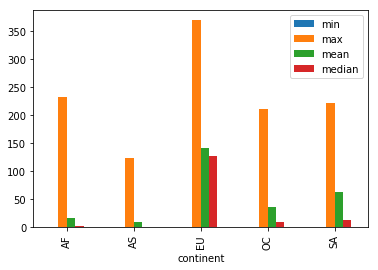

In [8]:
g = g.drop(['sum'], axis=1)
g.plot(kind='bar')

### Step 6. Print the mean alcoohol consumption per continent for every column

In [9]:
g = drinks.groupby(['continent']).mean()
g

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


### Step 7. Print the median alcoohol consumption per continent for every column

In [10]:
g = drinks.groupby(['continent']).median()
g

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,32.0,3.0,2.0,2.30
AS,17.5,16.0,1.0,1.20
EU,219.0,122.0,128.0,10.00
OC,52.5,37.0,8.5,1.75
SA,162.5,108.5,12.0,6.85


### Step 8. Print the mean, min and max values for spirit consumption.
#### This time output a DataFrame

In [11]:
g = drinks[['spirit_servings', 'continent']].groupby(['continent']).agg(['min', 'max', 'mean'])
g

spirit_servings                 
                      min  max        mean
continent                                 
AF                      0  152   16.339623
AS                      0  326   60.840909
EU                      0  373  132.555556
OC                      0  254   58.437500
SA                     25  302  114.750000